In [1]:
import tensorflow as tf
from modules.functions import *
import matplotlib.pyplot as plt

In [67]:
n_steps = 50
series = gen_time_series(10000, n_steps + 1)
x_train, y_train = series[:9000, :n_steps], series[:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [42]:
model = tf.keras.models.Sequential([

    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),  
    tf.keras.layers.SimpleRNN(20),    
    tf.keras.layers.Dense(1)    

])

model.compile('adam', 'mse')
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)

In [43]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=20, callbacks=[early_stopping])

Train on 900 samples, validate on 100 samples
Epoch 1/20
900/900 [==============================] - 2s 2ms/sample - loss: 0.0473 - val_loss: 0.0186
Epoch 2/20
900/900 [==============================] - 1s 618us/sample - loss: 0.0108 - val_loss: 0.0094
Epoch 3/20
900/900 [==============================] - 1s 644us/sample - loss: 0.0070 - val_loss: 0.0075
Epoch 4/20
900/900 [==============================] - 1s 641us/sample - loss: 0.0058 - val_loss: 0.0061
Epoch 5/20
900/900 [==============================] - 1s 645us/sample - loss: 0.0050 - val_loss: 0.0063
Epoch 6/20
900/900 [==============================] - 1s 635us/sample - loss: 0.0044 - val_loss: 0.0049
Epoch 7/20
900/900 [==============================] - 1s 641us/sample - loss: 0.0046 - val_loss: 0.0045
Epoch 8/20
900/900 [==============================] - 1s 634us/sample - loss: 0.0040 - val_loss: 0.0046
Epoch 9/20
900/900 [==============================] - 1s 662us/sample - loss: 0.0037 - val_loss: 0.0040
Epoch 10/20
900/900 

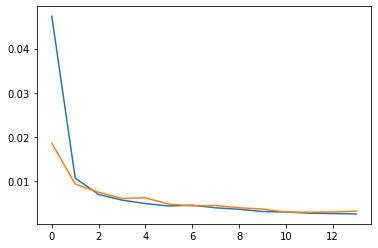

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [122]:
model.predict(x_test[:1])

array([[0.5733032]], dtype=float32)

In [239]:
model_input = gen_time_series(1, 50)


In [240]:
predictions = []

for el in range(0,50):
    prediction = model.predict(model_input)[:,np.newaxis,:]
    model_input = np.insert(model_input, model_input.size, prediction, 1)
    model_input = np.delete(model_input, 0, axis=1)
    predictions.append(prediction[0][0][0])
    #print('Predicted:', prediction[0][0][0])
    #model_input = np.concatenate([model_input, prediction], axis=1)
    #print(model_input.shape)

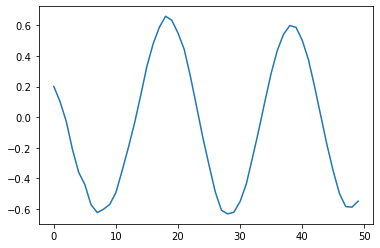

In [241]:
plt.plot(predictions)
